# Olympic Games – Exploratory Data Analysis (EDA)

Bu notebook, 120 yıllık Olympic sporcu verisi üzerinde kapsamlı bir EDA çalışması sunar.

Amaç:
- Sporcu demografisi (Age, Height, Weight)
- Spor & ülke bazlı dağılımlar
- Eksik değerleri belirleme ve istatistiksel doldurma
- Anomali tespiti
- Madalya dağılımları
- Zaman içindeki fiziksel ve performans trendleri

Bu EDA, veri setini makine öğrenimi modellemeleri için hazır hale getirmeyi amaçlar.


In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [220]:
data = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [222]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [223]:
data.drop(["ID","Games"],axis=1,inplace=True) # we will use name and year and season
data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Eksik Değer Analizi

Bu veri setinde eksik değerler özellikle Height ve Weight ve Age kolonlarında yoğunlaşmıştır.
Bu eksiklerin nedeni:
- Eski yıllarda ölçüm yapılmaması
- Kaydedilmemiş fiziksel veri
- Bazı spor dallarının fiziksel ölçüm gerektirmemesi


In [224]:
data.groupby("Event")[["Height","Weight","Age"]].mean()
data_copy = data.copy()

In [225]:
#Total null values Height Weight 
beforenulldata = data.groupby("Event")[["Height", "Weight","Age"]].apply(lambda x: x.isna())
beforenulldata.sum()

Height    60171
Weight    62875
Age        9474
dtype: int64

In [226]:
print(data.groupby("Event")[["Height", "Weight","Age"]].apply(lambda x: x.isna().sum()))
print(data.groupby("Event")[["Height", "Weight","Age"]].mean().isna().sum())
#As 171 event, weight values null
#As 98 event, height values null
#As 8 event, age values null

                                                Height  Weight  Age
Event                                                              
Aeronautics Mixed Aeronautics                        1       1    0
Alpine Skiing Men's Combined                       173     177    1
Alpine Skiing Men's Downhill                       395     397   18
Alpine Skiing Men's Giant Slalom                   478     480   31
Alpine Skiing Men's Slalom                         534     537   28
...                                                ...     ...  ...
Wrestling Women's Flyweight, Freestyle               0       0    0
Wrestling Women's Heavyweight, Freestyle             0       0    0
Wrestling Women's Light-Heavyweight, Freestyle       0       0    0
Wrestling Women's Lightweight, Freestyle             0       0    0
Wrestling Women's Middleweight, Freestyle            0       1    0

[765 rows x 3 columns]
Height     98
Weight    171
Age         8
dtype: int64


In [227]:
#For every event, find height and weight and write mean to null value
data_copy["Height"] = data.groupby("Event")["Height"].transform(lambda x: x.fillna(x.mean()))
data_copy["Weight"] = data.groupby("Event")["Weight"].transform(lambda x: x.fillna(x.mean()))
data_copy["Age"] = data.groupby("Event")["Age"].transform(lambda x: x.fillna(x.mean()))
data_copy["Age"] = data.groupby("Sport")["Age"].transform(lambda x: x.fillna(x.mean()))

In [228]:
#Rest null values
afternulldata = data_copy.groupby("Event")[["Height", "Weight","Age"]].apply(lambda x: x.isna())
afternulldata.sum() 

Height    2083
Weight    4660
Age          0
dtype: int64

In [229]:
# Tavel review null values
data_copy.groupby("Event")[["Height", "Weight","Age"]].apply(lambda x: x.isna().sum()) 

,Height,Weight,Age
Event,,,
Aeronautics Mixed Aeronautics,1,1,0
Alpine Skiing Men's Combined,0,0,0
Alpine Skiing Men's Downhill,0,0,0
Alpine Skiing Men's Giant Slalom,0,0,0
Alpine Skiing Men's Slalom,0,0,0
...,...,...,...
"Wrestling Women's Flyweight, Freestyle",0,0,0
"Wrestling Women's Heavyweight, Freestyle",0,0,0
"Wrestling Women's Light-Heavyweight, Freestyle",0,0,0


# KNN ile Eksik Değer Tamamlama

Eksik Height ve Weight değerlerini doldurmak için KNN Imputation uygulandi.

Neden KNN?
- Sporcuların fiziki özellikleri spor dalına göre belirgin şekilde değişiyor.
- Basit ortalama imputation sporlar arası farklılıkları yok eder.
- KNN, benzer sporcuları (Age, Sex, Sport, Event) kullanarak çok daha gerçekçi doldurma sağlar.



In [230]:
#Knn filling null
from sklearn.impute import KNNImputer

mask = data_copy["Height"].isna() | data_copy["Weight"].isna() 
subset = data_copy.loc[mask, :]


subset_enc = pd.get_dummies(subset[["Sex","NOC"]], drop_first=True)
subset_knn = pd.concat([subset[["Age","Height", "Weight"]], subset_enc], axis=1)
imputer = KNNImputer(n_neighbors=3)
subset_knn

,Age,Height,Weight,Sex_M,NOC_ARG,NOC_AUS,NOC_AUT,NOC_BEL,NOC_BOH,NOC_BRA,...,NOC_SUI,NOC_SWE,NOC_TCH,NOC_TUR,NOC_UNK,NOC_URS,NOC_URU,NOC_USA,NOC_VEN,NOC_YUG
86,24.0,NaN,NaN,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106,20.0,NaN,NaN,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,20.0,NaN,NaN,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
921,21.0,NaN,NaN,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1203,55.0,175.000000,NaN,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270575,21.0,NaN,NaN,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270747,27.0,174.000000,NaN,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
270748,27.0,173.916667,NaN,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
270749,27.0,177.750000,NaN,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [231]:
filled_subset = imputer.fit_transform(subset_knn)
filled_subset = pd.DataFrame(filled_subset, columns=subset_knn.columns)
filled_subset

,Age,Height,Weight,Sex_M,NOC_ARG,NOC_AUS,NOC_AUT,NOC_BEL,NOC_BOH,NOC_BRA,...,NOC_SUI,NOC_SWE,NOC_TCH,NOC_TUR,NOC_UNK,NOC_URS,NOC_URU,NOC_USA,NOC_VEN,NOC_YUG
0,24.0,174.566667,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,177.666667,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,177.666667,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,175.666667,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55.0,175.000000,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,21.0,173.222222,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4904,27.0,174.000000,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4905,27.0,173.916667,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4906,27.0,177.750000,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
#All data ok
data_copy.loc[mask, "Height"] = filled_subset["Height"].values
data_copy.loc[mask, "Weight"] = filled_subset["Weight"].values
data = data_copy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [233]:
#has medal list
medal_filter = ~pd.isnull(data["Medal"])
data = data[medal_filter]
data.info()
data.to_csv("athlete_events_clean.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Sex     39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


# Graph
Data frequency Analysis

In [234]:
def plotHis(df,value):
    plt.figure()
    plt.hist(df[value],bins=85,color="orange")
    plt.xlabel(value)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(value))
    plt.show()
def plotScatter(df,valx,valy,label,color):    
    plt.figure(figsize=(7,4))
    plt.scatter(df[valx], df[valy], alpha =0.4, label=label,color=color)
    plt.xlabel(valx)
    plt.ylabel(valy)
    plt.legend()
    plt.show()
def plotBox(df,value):
    plt.figure()
    plt.boxplot(df[value])
    plt.xlabel(value)
    plt.ylabel("Value")
    plt.title("Box Graph for {}".format(value))
    plt.show()
def plotBar(df,value,n=5):
    data_n = df[value]
    data_count = data_n.value_counts()
    data_count = data_count[:n]
    plt.figure()
    plt.bar(data_count.index,data_count,color = "orange")
    plt.xticks(data_count.index,data_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(value))
    plt.show()
    print("{}: \n {}".format(value,data_count))

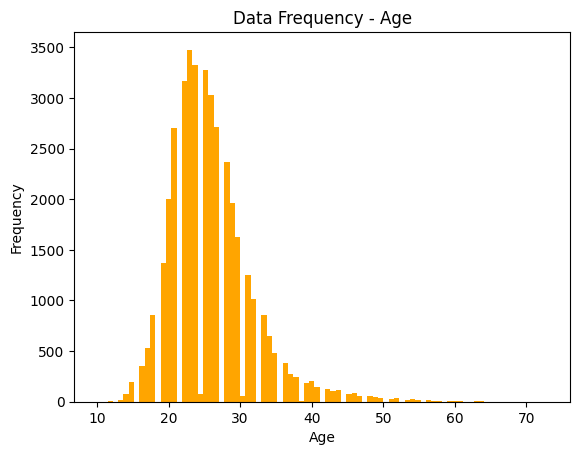

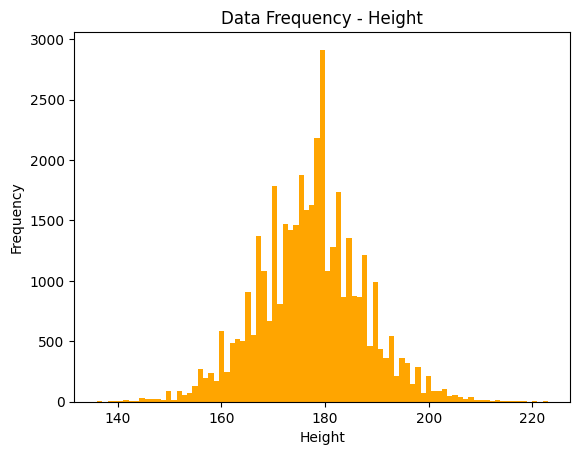

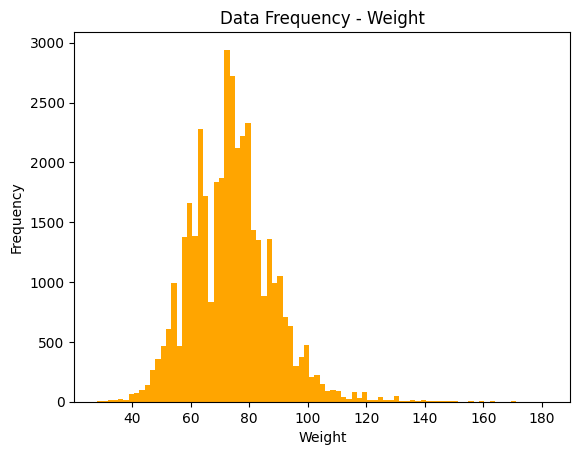

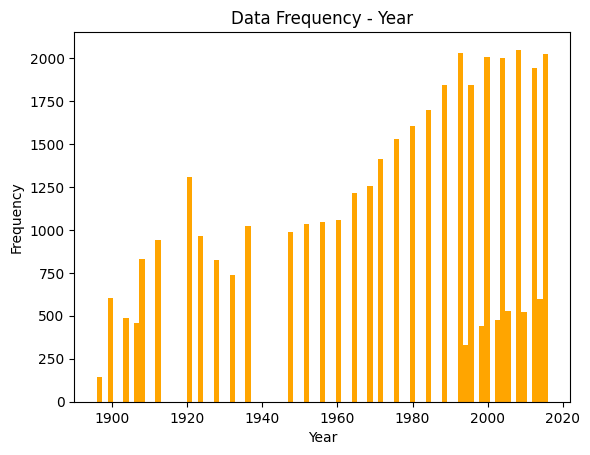

In [235]:
num_val = ["Age","Height","Weight","Year"]
for i in num_val:
    plotHis(data,i)

* Age Frequency 15-40
* Height Frequency 150-200
* Weight Frequency 50 -90
* After 1990 summer sport and same years havent

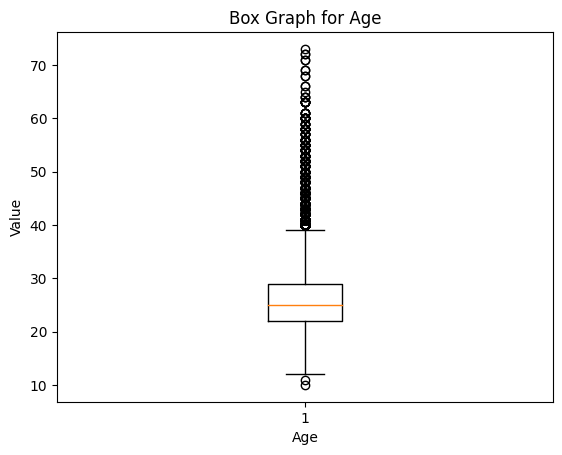

In [236]:
plotBox(data,"Age")

* Age has outlier value frequency 15-40

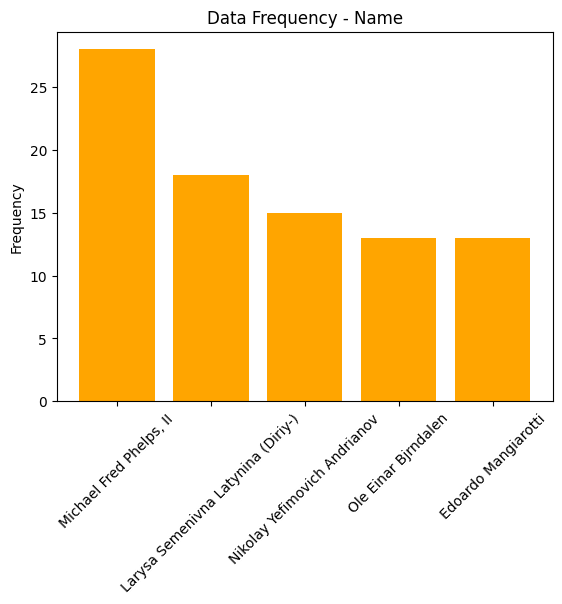

Name: 
 Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


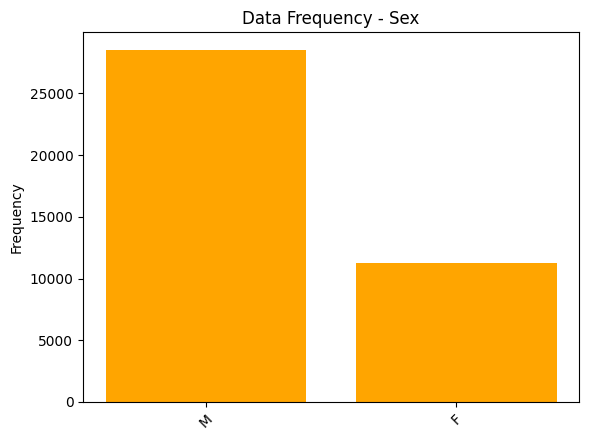

Sex: 
 Sex
M    28530
F    11253
Name: count, dtype: int64


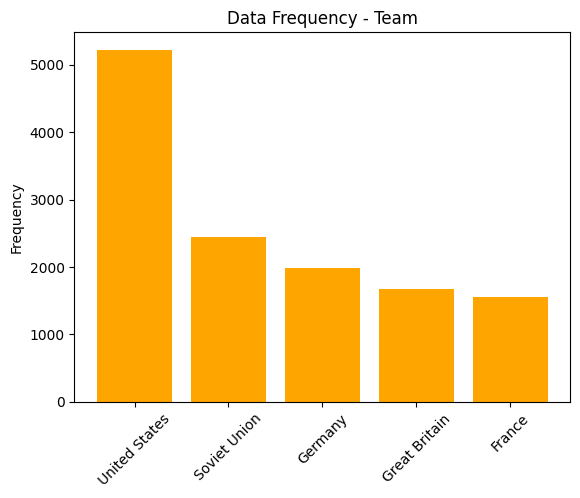

Team: 
 Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


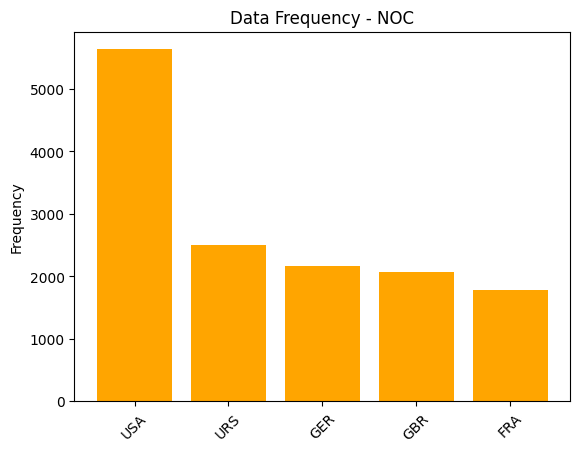

NOC: 
 NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


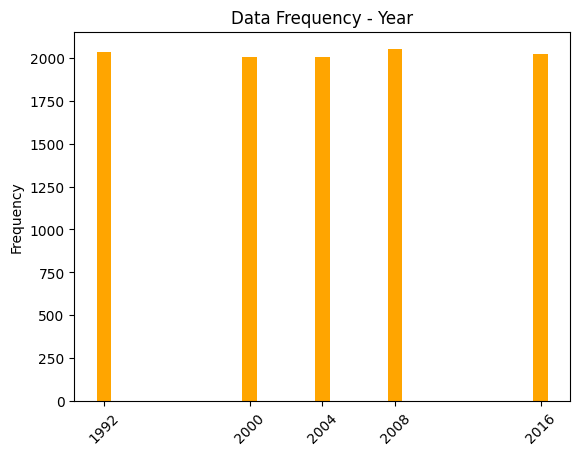

Year: 
 Year
2008    2048
1992    2030
2016    2023
2000    2004
2004    2001
Name: count, dtype: int64


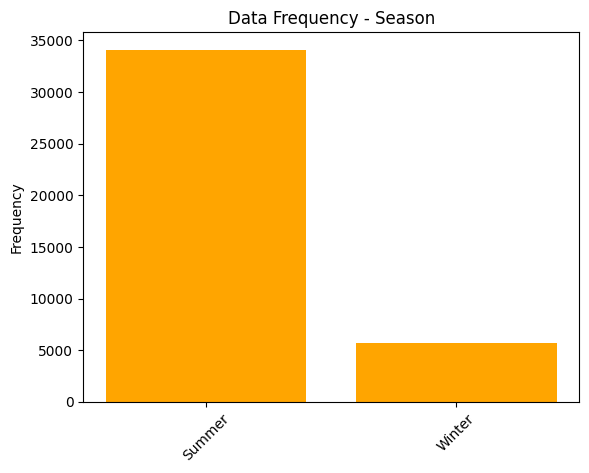

Season: 
 Season
Summer    34088
Winter     5695
Name: count, dtype: int64


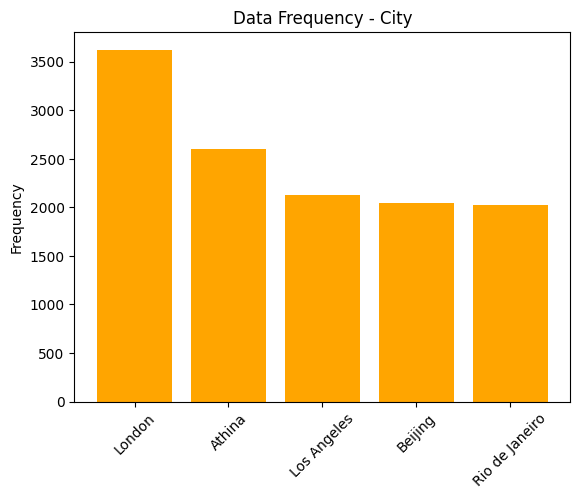

City: 
 City
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


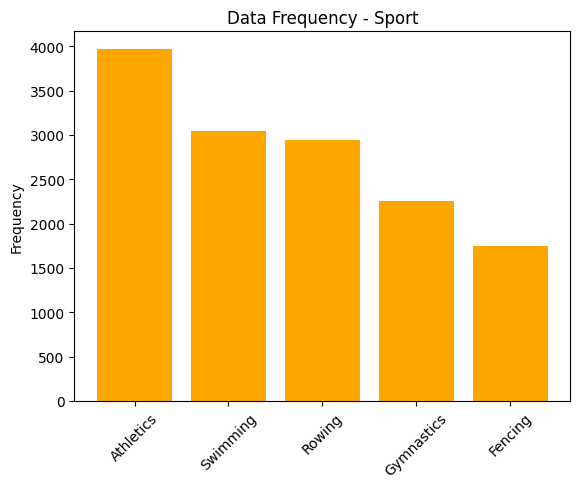

Sport: 
 Sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


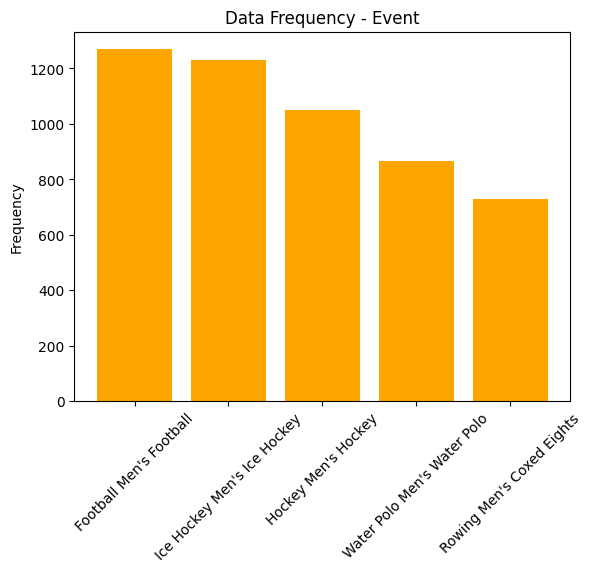

Event: 
 Event
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


In [237]:
cat_val = ["Name","Sex","Team","NOC","Year","Season","City","Sport","Event"]
for i in cat_val:
    plotBar(data,i)


Highlight Categorical
* Michael Fred Phelps, II
* Male
* United States
* USA
* 2008
* Summer
* London
* Athletics
* Football Men's Football

# Bivariate Analysis

In [238]:
#as gender weight height
gender_Male = data[data.Sex == "M"]
gender_Female = data[data.Sex == "F"]

In [239]:
sex_rate = pd.crosstab(data["Sex"], data['Height'], normalize='index') * 100
print("\Height (row %):")
print(sex_rate.round(2))



\Height (row %):
Height  136.0  137.0  138.0  139.0  140.0  141.0  142.0  143.0  144.0  145.0  \
Sex                                                                            
F        0.04   0.02   0.01   0.04   0.05   0.03   0.11   0.08   0.05   0.25   
M        0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

Height  ...  212.0  213.0  214.0  215.0  216.0  217.0  218.0  219.0  220.0  \
Sex     ...                                                                  
F       ...   0.00   0.00   0.00   0.00   0.00   0.00   0.00    0.0   0.00   
M       ...   0.01   0.05   0.01   0.02   0.03   0.01   0.02    0.0   0.01   

Height  223.0  
Sex            
F        0.00  
M        0.01  

[2 rows x 564 columns]


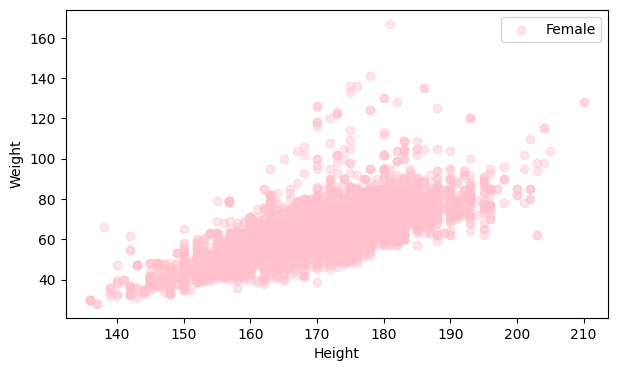

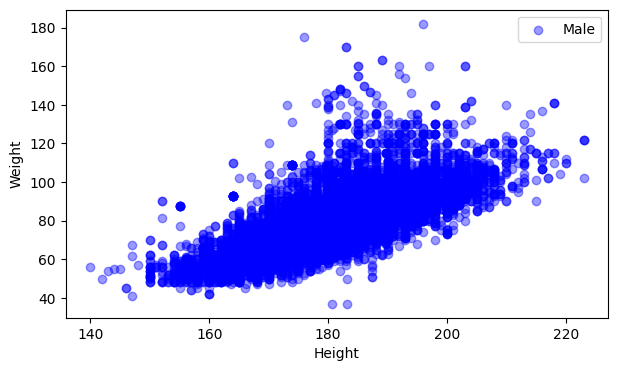

In [240]:
# Graph
# Female Height Weight
plotScatter(gender_Female,"Height","Weight","Female","Pink")
plotScatter(gender_Male,"Height","Weight","Male","Blue")

In [241]:
data.loc[:,["Age","Height","Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.057234,0.154680
Height,0.057234,1.000000,0.787659
Weight,0.154680,0.787659,1.000000


* Corr Age Weight

In [242]:
# Medal - Age
data_copy=data.copy()
data_n = pd.get_dummies(data_copy[["Medal","Age"]])
data_copy.drop(["Medal"],axis=1,inplace=True)
data_copy = pd.concat([data_n, data_copy], axis=1)
data_n.corr()
data_copy.columns

Index(['Age', 'Medal_Bronze', 'Medal_Gold', 'Medal_Silver', 'Name', 'Sex',
       'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event'],
      dtype='object')

In [243]:
data_copy.groupby("Team")[["Medal_Bronze","Medal_Gold","Medal_Silver"]].sum().sort_values(by="Medal_Gold",ascending =False)[:10]


,Medal_Bronze,Medal_Gold,Medal_Silver
Team,,,
United States,1233,2474,1512
Soviet Union,677,1058,716
Germany,678,679,627
Italy,484,535,508
Great Britain,572,519,582
France,577,455,518
Sweden,507,451,476
Hungary,365,432,330
Canada,408,422,413


In [244]:
data_copy.groupby("City")[["Medal_Bronze","Medal_Gold","Medal_Silver"]].sum().sort_values(by="Medal_Gold",ascending =False)[:10]

,Medal_Bronze,Medal_Gold,Medal_Silver
City,,,
London,1214,1215,1195
Athina,860,883,859
Los Angeles,706,726,691
Beijing,710,671,667
Rio de Janeiro,703,665,655
Sydney,680,663,661
Atlanta,629,608,605
Barcelona,604,559,549
Seoul,549,520,513


In [245]:
data_copy.groupby("Sex")[["Medal_Bronze","Medal_Gold","Medal_Silver"]].sum().sort_values(by="Medal_Gold",ascending =False)

,Medal_Bronze,Medal_Gold,Medal_Silver
Sex,,,
M,9524,9625,9381
F,3771,3747,3735


In [246]:
data_piv = data.pivot_table(index="Medal",columns="Sex",values=["Height","Weight","Age"],aggfunc={"Height":np.mean,"Weight":np.mean,"Age":[min,max,np.std]})
data_piv.head()

Age                                            Height              \
         max         min             std                  mean               
Sex        F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329705  5.898764  169.993223  180.002974   
Gold    63.0  64.0  13.0  13.0  5.220782  6.012347  170.438109  180.256487   
Silver  55.0  73.0  11.0  13.0  5.265223  6.128709  170.229344  179.992305   

           Weight             
             mean             
Sex             F          M  
Medal                         
Bronze  62.779146  78.098964  
Gold    63.230508  78.554205  
Silver  62.888577  78.297990

# Anomali Tespiti

Fiziksel ölçülerde uç değerler:
- ölçüm hatası,
- veri giriş hatası,
- nadir fiziksel özellikli sporcular

olabilir.

IQR yöntemiyle her kolon için alt ve üst sınırlar belirlenmiş ve bu sınırların dışında kalan gözlemler tespit edilmiştir.

Ayrıca bir sporcu birden fazla fiziksel kolon için outlier ise 'multi-outlier' olarak işaretlenmiştir.


In [247]:
#Anomaly Detection
def anomalyDetect(df,prop):
    outlier_indices=[]
    for c in prop:
        Q1 =np.percentile(df[c],25)
        Q3 =np.percentile(df[c],75)
        IQR =Q3-Q1
        outlier_step = 1.5 * IQR
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_list_col = df[(df[c] < lower) | (df[c] > upper)].index
        outlier_indices.extend(outlier_list_col)
      
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers=list(i for i, v in outlier_indices.items() if v > 1)
    return multiple_outliers

In [248]:
data_anomaly = data.loc[anomalyDetect(data,["Age","Height","Weight"])]
data_anomaly.Sport.value_counts()

Sport
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

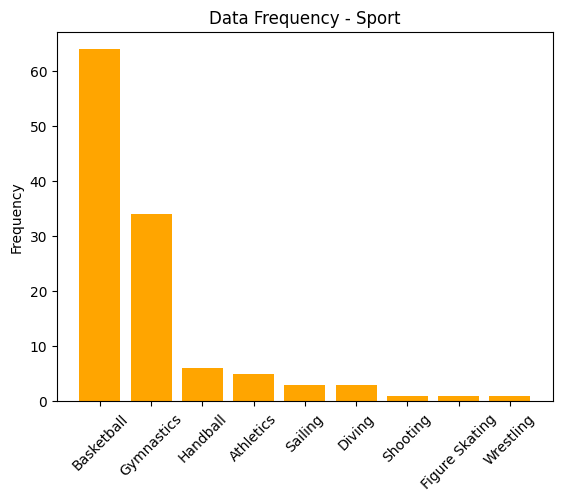

Sport: 
 Sport
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64


In [249]:
plotBar(data_anomaly,"Sport",n=10)

* Basketball has more outlier value about age height weight

In [250]:
data_anomaly[data_anomaly.Sport == "Basketball"]

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


# Madalya Analizi

Bu bölümde sporcuların kazandığı madalyalar araştırılır.

Yıllar içindeki madalya dağılımı:
- Hangi ülkeler yükselişte?
- Hangi spor dalları en çok madalya getiriyor?
- Kadın erkek madalya farkı nasıl?

sorularını yanıtlar.


In [251]:
#As Year - Medal
data_dum = data.copy()
data_medal = pd.get_dummies(data_dum["Medal"])
data_dum= pd.concat([data_dum,data_medal],axis=1)
data_medal = (
    data_dum
    .groupby(["Year", "Season"])
    .agg({
        "Bronze": "sum",
        "Silver": "sum",
        "Gold": "sum",
        "Age": "mean",
        "Height": "mean",
        "Weight": "mean"
    })
)
data_medal

Bronze  Silver  Gold        Age      Height     Weight
Year Season                                                        
1896 Summer      38      43    62  24.108495  173.912100  74.158480
1900 Summer     175     228   201  28.138297  177.066768  77.677093
1904 Summer     150     163   173  26.378924  177.089419  75.786883
1906 Summer     145     156   157  26.578907  175.686147  76.017306
1908 Summer     256     281   294  27.778639  176.606997  74.927914
1912 Summer     300     315   326  27.547135  176.771980  75.918507
1920 Summer     367     448   493  29.397980  176.036781  75.049977
1924 Summer     274     281   277  27.678864  176.772221  74.774981
     Winter      37      38    55  31.095559  175.425610  76.241102
1928 Summer     250     239   245  26.370786  175.481646  72.114867
     Winter      31      28    30  25.495620  176.918790  77.105202
1932 Summer     204     214   229  26.287036  175.235625  73.644044
     Winter      28      32    32  26.423913  177.801188  76.821928
1936 Summer     295     310   312  26.056398  177.580426  74.909857
     Winter      35      37    36  25.388889  177.066351  75.016652
1948 Summer     279     284   289  28.261727  176.862928  73.566944
     Winter      46      48    41  26.985185  177.351839  76.857166
1952 Summer     300     291   306  26.826977  176.459490  72.956446
     Winter      47      44    45  26.463235  177.023010  76.734303
1956 Summer     298     293   302  25.692933  176.306665  73.055553
     Winter      50      49    51  25.860000  174.650908  73.586974
1960 Summer     308     294   309  25.027551  176.024709  72.664609
     Winter      49      48    50  25.387755  173.480577  71.454960
1964 Summer     343     339   347  25.191409  176.687973  73.782988
     Winter      58      67    61  25.532258  174.097332  72.822327
1968 Summer     358     340   359  24.847041  177.660693  73.707659
     Winter      63      70    66  25.638191  174.970989  72.683367
1972 Summer     419     392   404  24.817329  177.929349  74.360012
     Winter      66      63    70  25.206030  175.462312  72.959799
1976 Summer     448     434   438  24.227273  178.215873  74.323953
     Winter      70      71    70  25.383886  175.423953  72.745917
1980 Summer     469     458   457  24.281069  177.918217  74.110303
     Winter      73      73    72  24.454128  176.714295  73.625926
1984 Summer     502     477   497  24.240552  178.128088  73.228487
     Winter      74      74    74  24.351351  177.164847  73.949510
1988 Summer     549     513   520  24.432364  179.118695  74.565239
     Winter      88      88    87  24.904943  177.146348  73.651537
1992 Summer     604     549   559  24.685164  178.340870  74.142927
     Winter     106     108   104  24.578616  175.951958  71.950957
1994 Winter     112     109   110  25.247734  175.759434  72.362212
1996 Summer     629     605   608  25.433225  177.929257  73.575104
1998 Winter     150     145   145  26.050000  175.040529  72.402477
2000 Summer     680     661   663  26.110279  178.010360  73.811523
2002 Winter     159     157   162  26.962343  175.219665  72.881003
2004 Summer     677     660   664  26.157421  178.144284  74.011983
2006 Winter     175     175   176  27.338403  175.882129  73.061787
2008 Summer     710     667   671  26.046875  178.299757  74.263138
2010 Winter     171     175   174  26.723077  175.759615  72.840592
2012 Summer     679     630   632  26.066461  178.305756  73.726404
2014 Winter     198     197   202  26.644891  175.353434  71.756479
2016 Summer     703     655   665  26.325260  178.371739  73.963764

<Figure size 640x480 with 0 Axes>

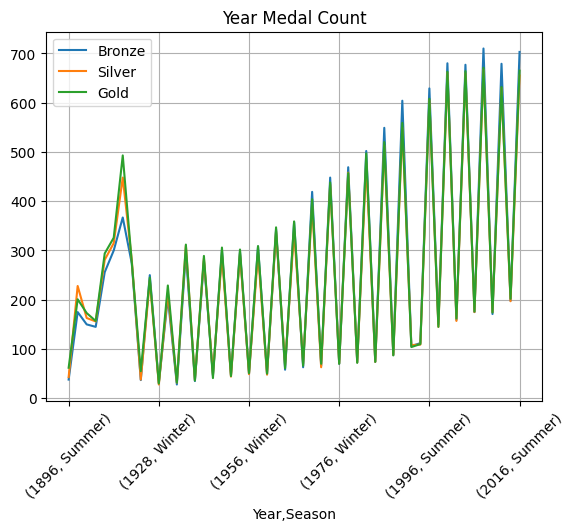

In [252]:
plt.figure()
data_medal.loc[:,["Bronze","Silver","Gold"]].plot()
plt.grid(True)
plt.xticks(rotation=45)
plt.title("Year Medal Count")
plt.show()

In [253]:
#data_medal_summer = data_medal[(data_medal["Season"] == "Summer")]
data_medal_summer = data_dum[data_dum["Season"] == "Summer"]
data_medal_winter = data_dum[data_dum["Season"] == "Winter"]
data_medal_summer = (data_medal_summer.groupby(["Year"])
                     .agg({
                         "Bronze": "sum",
                         "Silver": "sum",
                         "Gold": "sum",
                         "Age": "mean",
                         "Height": "mean",
                         "Weight": "mean"
                     }))
data_medal_winter = (data_medal_winter.groupby(["Year"])
                     .agg({
                         "Bronze": "sum",
                         "Silver": "sum",
                         "Gold": "sum",
                         "Age": "mean",
                         "Height": "mean",
                         "Weight": "mean"
                     }))

<Figure size 640x480 with 0 Axes>

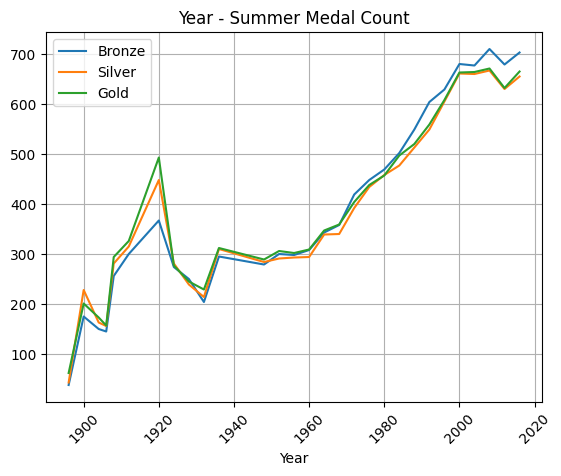

In [254]:
plt.figure()
data_medal_summer.loc[:,["Bronze","Silver","Gold"]].plot()
plt.grid(True)
plt.xticks(rotation=45)
plt.title("Year - Summer Medal Count")
plt.show()

- Summer medal pick 1920 after linear


<Figure size 640x480 with 0 Axes>

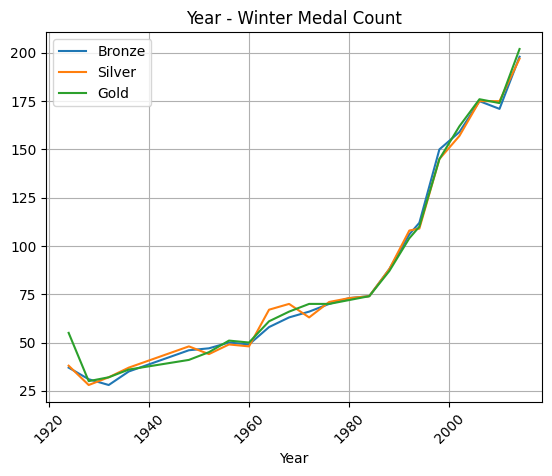

In [255]:
plt.figure()
data_medal_winter.loc[:,["Bronze","Silver","Gold"]].plot()
plt.grid(True)
plt.xticks(rotation=45)
plt.title("Year - Winter Medal Count")
plt.show()

- Winter medal after 1980 up rate increase

#  Sonuçlar

Bu EDA çalışması sonucunda:

- Height ve Weight eksik değerleri KNN ile başarılı biçimde dolduruldu.
- Spor türlerine göre fiziksel özelliklerin belirgin şekilde ayrıldığı görüldü.
- Anomaly detection ile olası hatalı veri girişleri tespit edildi.
- Madalya analizleri ülkeler ve yıllar bazında önemli trendler ortaya koydu.
- Veri seti temiz, düzenli ve makine öğrenimine hazır hale getirildi.

Bu çalışma, gelecekte yapılacak:
- Medal classification
- Athlete clustering
- Performance prediction
gibi ML projeleri için güçlü bir temel oluşturur.
